In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# pySuperfish Fish Example

This example should run on macOS and Windows

In [2]:
from superfish import Superfish

In [3]:
import os
AMFILE = os.path.join('data', 'swifel_5.255_8.148_36.000_4.763_8.667_30.000_4.705_2.735_2.000_8607.am')
assert os.path.exists(AMFILE)

In [4]:
SF = Superfish(AMFILE, verbose=True)

Configured to run in: /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpyl7z6ouk
Using container on Darwin:
     docker run {interactive_flags} --rm -v {local_path}:/data/ {image} {cmds}


In [5]:
# Run, should take about a minute
SF.run()

Running: docker run  --rm -v /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpyl7z6ouk:/data/ hhslepicka/poisson-superfish:latest autofish SWIFEL_5.255_8.148_36.000_4.763_8.667_30.000_4.705_2.735_2.000_8607.AM
Done in      94.53 seconds
Parsed output: /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpyl7z6ouk/SWIFEL_5.255_8.148_36.000_4.763_8.667_30.000_4.705_2.735_2.000_8607.SFO


In [6]:
# This is automatically done above
SF.load_output()

Parsed output: /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpyl7z6ouk/SWIFEL_5.255_8.148_36.000_4.763_8.667_30.000_4.705_2.735_2.000_8607.SFO


# SFO Output

In [7]:
SF.output.keys()

dict_keys(['sfo'])

In [8]:
SF.output['sfo'].keys()

dict_keys(['wall_segments', 'other', 'header', 'BeamEnergy', 'summary'])

In [9]:
# Readback of the basic parameters, with the description

header = SF.output['sfo']['header']
for key in header['variable']:
    print(f"{key:10} {header['variable'][key]:16} {header['description'][key]}")

ALPHAT              0.00393 Temperature coefficient of resistance
ASCALE           3767.30313 Scaling factor for H at drive point
BETA                   0.95 Particle velocity
BETA1                   0.1 Starting BETA in transit-time table
BETA2                  0.95 Ending BETA in transit-time table
CCLDELK                 1.0 Increment for coupling for table in SFO
CCLMAXK                 6.0 Highest coupling for table in SFO
CCLMINK                 1.0 Lowest coupling for table in SFO
CLENGTH                 0.0 Cavity length for normalization in SFO
CLIGHT        29979245800.0 Exact speed of light in cm/sec
CONV                    1.0 Length conversion (number of units per cm)
DBETA                  0.05 BETA increment in transit-time table
DELFR                   0.0 Frequency step size for a resonance search
DIAGDLL                   0 If 1, DLL writes diagnostics to DiagDLL.txt
DKSQ        1.627688938e-10 Change in k^2 after an iteration in Fish
DPHI                  180.0 Phase

In [10]:
SF.output['sfo']['summary']

{'type': 'summary',
 'data': {'Enorm': 30.0,
  'integration_Z1': 50.5,
  'integration_R1': 0.0,
  'integration_Z2': 50.51,
  'integration_R2': 0.0,
  'Frequency': 176.58226,
  'Particle rest mass energy': 0.510999,
  'beta': 0.95,
  'kinetic_energy': 1.51776,
  'Normalization factor for E0': 44847.651,
  'Transit-time factor': 0.996539,
  'Stored energy': 13.8864794,
  'Superconductor surface resistance': 22.1335,
  'Operating temperature': 4.2,
  'Power dissipation': 4298.6018,
  'Q': 3584200000.0,
  'Shunt impedance': 2329980.986,
  'Rs*Q': 79.331,
  'Z*T*T': 2313880.819,
  'r/Q': 148.483,
  'Wake loss parameter': 0.04119,
  'AvgH': 10446.9,
  'MaxH_z': 26.5467,
  'MaxH_r': 16.5207,
  'MaxH': 24224.2,
  'MaxE_z': 49.9185,
  'MaxE_r': 2.61258,
  'MaxE': 32.3126,
  'Ratio of peak fields Bmax/Emax': 0.9421,
  'Peak-to-average ratio Emax/E0': 4.8966},
 'units': {'Enorm': 'MV/m',
  'integration_Z1': 'cm',
  'integration_R1': 'cm',
  'integration_Z2': 'cm',
  'integration_R2': 'cm',
  'Fre

In [11]:
SF.output['sfo']['summary']['data']

{'Enorm': 30.0,
 'integration_Z1': 50.5,
 'integration_R1': 0.0,
 'integration_Z2': 50.51,
 'integration_R2': 0.0,
 'Frequency': 176.58226,
 'Particle rest mass energy': 0.510999,
 'beta': 0.95,
 'kinetic_energy': 1.51776,
 'Normalization factor for E0': 44847.651,
 'Transit-time factor': 0.996539,
 'Stored energy': 13.8864794,
 'Superconductor surface resistance': 22.1335,
 'Operating temperature': 4.2,
 'Power dissipation': 4298.6018,
 'Q': 3584200000.0,
 'Shunt impedance': 2329980.986,
 'Rs*Q': 79.331,
 'Z*T*T': 2313880.819,
 'r/Q': 148.483,
 'Wake loss parameter': 0.04119,
 'AvgH': 10446.9,
 'MaxH_z': 26.5467,
 'MaxH_r': 16.5207,
 'MaxH': 24224.2,
 'MaxE_z': 49.9185,
 'MaxE_r': 2.61258,
 'MaxE': 32.3126,
 'Ratio of peak fields Bmax/Emax': 0.9421,
 'Peak-to-average ratio Emax/E0': 4.8966}

# Plot

In [12]:
# Nicer plotting
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

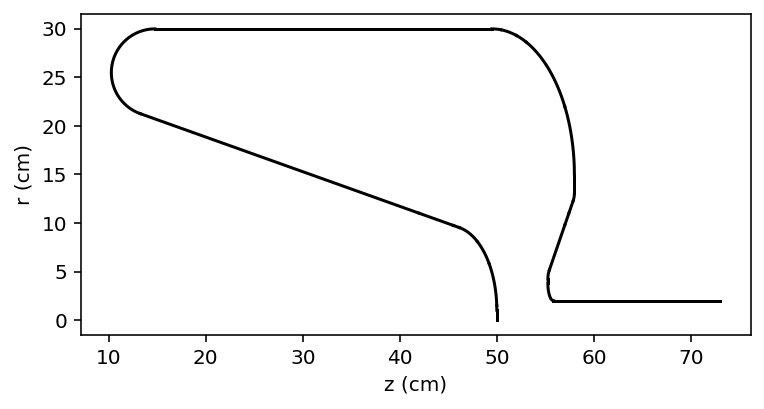

In [13]:
SF.plot_wall()

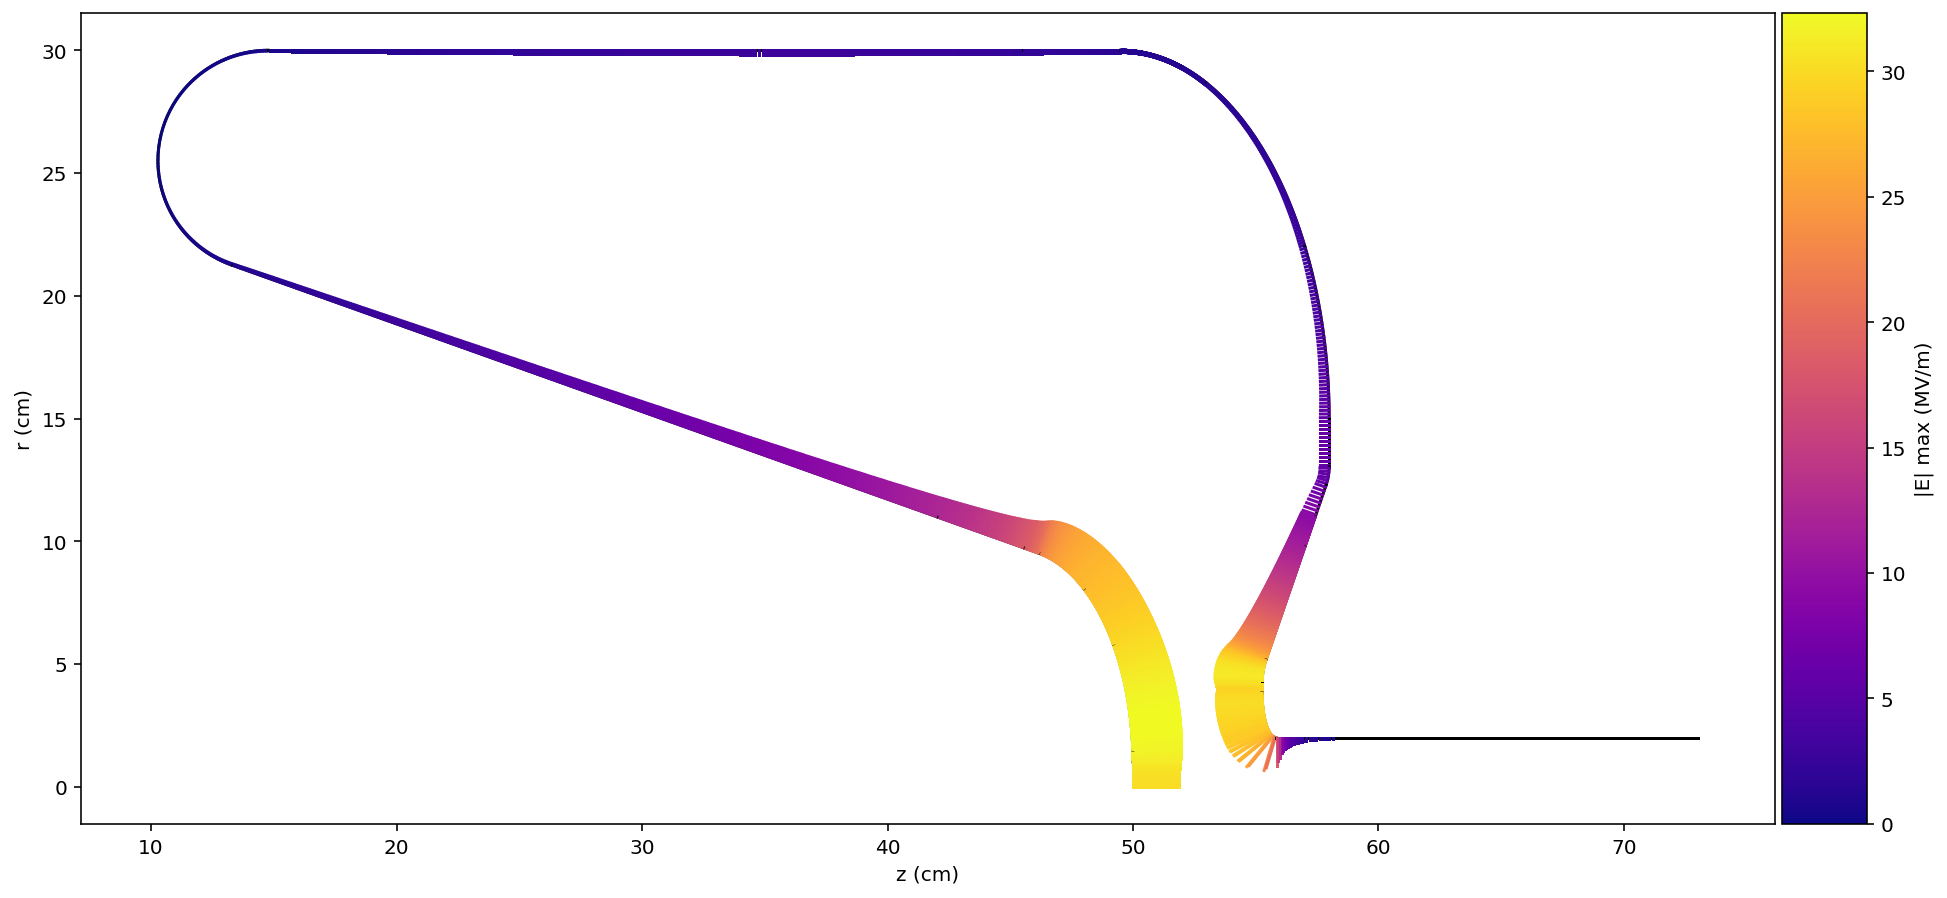

In [14]:
SF.plot_wall(perp_scale=2, figsize=(16,9))

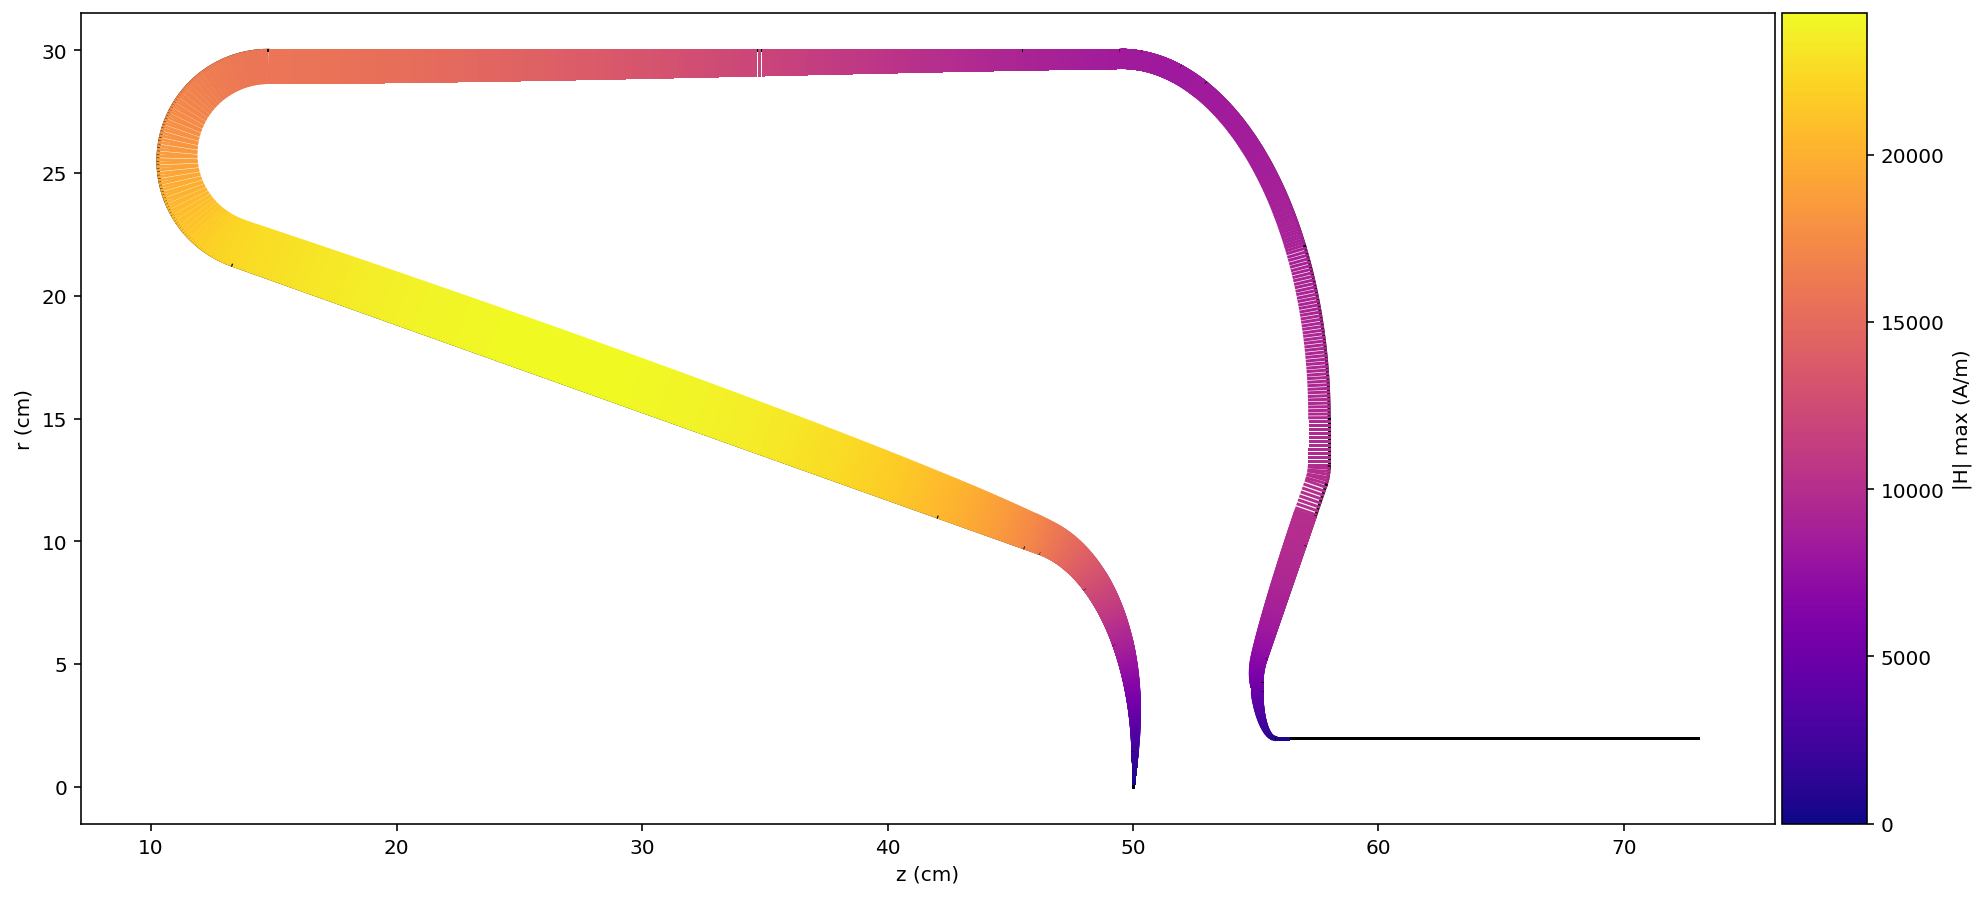

In [15]:
SF.plot_wall(perp_scale=2, field='H', figsize=(16,9))

# Interpolate

In [16]:
?SF.interpolate

Signature: SF.interpolate(zmin=-1000, zmax=1000, nz=100, rmin=0, rmax=0, nr=1)
Docstring: Interpolates field over a grid. 
File:      ~/Code/GitHub/pySuperfish/superfish/superfish.py
Type:      method


In [17]:
SF.interactive = False

In [18]:
%%time
# Get the data
t7data = SF.interpolate(zmin=50, zmax = 70, rmax = 3, nz=100, nr=20)

t7data.keys()

Running: docker run  --rm -v /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpyl7z6ouk:/data/ hhslepicka/poisson-superfish:latest sf7 SWIFEL_5.255_8.148_36.000_4.763_8.667_30.000_4.705_2.735_2.000_8607.IN7
CPU times: user 22.7 ms, sys: 11.8 ms, total: 34.4 ms
Wall time: 7.94 s


dict_keys(['geometry', 'problem', 'zmin', 'zmax', 'nz', 'freq', 'rmin', 'rmax', 'nr', 'Ez', 'Er', 'E', 'Hphi'])

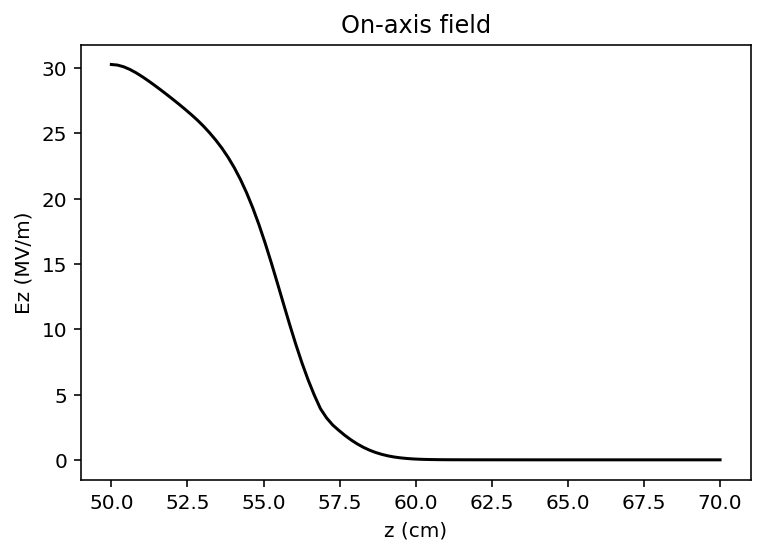

In [19]:
from superfish import plot
import numpy as np

z = np.linspace(t7data['zmin'], t7data['zmax'], t7data['nz'])
Ez = t7data['Ez'][0,:]

plt.title('On-axis field')
plt.xlabel('z (cm)')
plt.ylabel('Ez (MV/m)')
plt.plot(z, Ez, color='black')

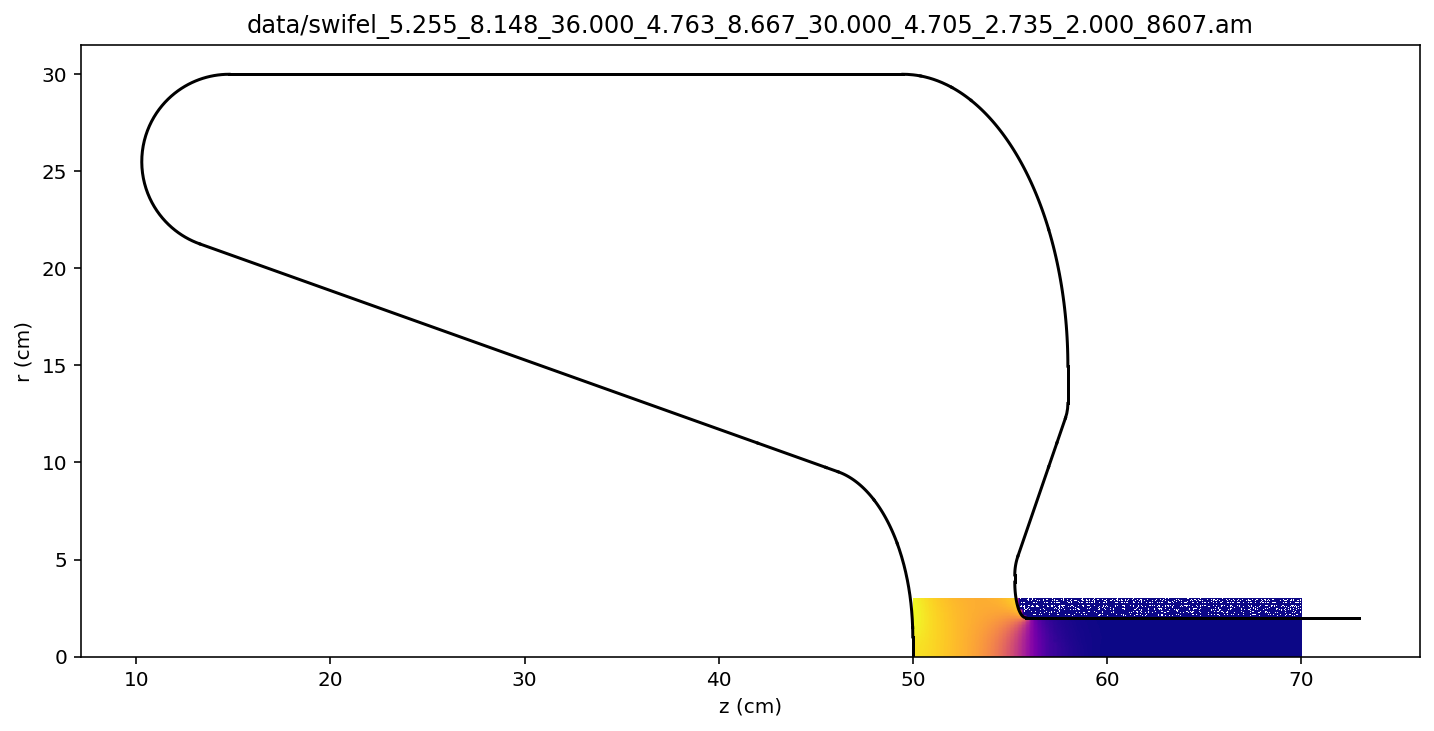

In [23]:
# Plot field data
fig, ax = plt.subplots(figsize=(12,7))

ax.set_title(AMFILE)

plot.add_t7data_to_axes(t7data, ax, field='E')

plot.plot_wall(SF.output['sfo']['wall_segments'], ax=ax)


# Interactive

You can use Superfish's own graphical tools with the interactive flag.


In [21]:
SF.interactive = True


# This will pop up the WSFPLOT.EXE window.
SF.run_cmd('wsfplot')

Running: IP=$(ifconfig en0 | grep inet | awk '$1=="inet" {print $2}');xhost + $IP;docker run -e INTERACTIVE_FISH=1 -e DISPLAY=$IP:0 --rm -v /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpyl7z6ouk:/data/ hhslepicka/poisson-superfish:latest wsfplot


0

In [22]:
# Save 
#!cp {SF.path}/SWIFEL1.T7 data/SWIFEL.T7
#!cp {SF.path}/OUTSF7.TXT data/SWIFEL_OUTSF7.TXT